In [31]:
'''
Reducing   the   five-dimensional   records   to   two   dimensions  by   means of   the   principal   component   analysis.
 
 Steps   for   PCA:
1. Standardization   the   data   X.
2. Computing   the   Eigenvectors   and   Eigenvalues   from   the   covariance   matrix.
3. Sorting eigenvalues in descending order and choosing the k eigenvectors that correspond to
    the k largest   eigenvalues   where k   will   be   the   number   of   dimensions   of   the   new   feature   space.
4. building   the   projection   matrix W from   the   selected k eigenvectors.
5. Transforming   the   original   dataset X using W to   obtain   a k-dimensional   feature   space. '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(
    filepath_or_buffer='data_que3.csv',
    header=None,
    sep=',')
#data.columns = ['f1', 'f2', 'f3', 'f4', 'f5']
data.dropna(how="all", inplace=True)
data.tail()
X = data.iloc[:, 0:5].values

# Normalization
X_std = StandardScaler().fit_transform(X)
orig=X_std
cov_mat = np.cov(X_std.T)

# Computing Eigenvectors and Eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

Eigenvectors 
[[ -3.42730362e-01  -6.01629269e-01   6.89497262e-01   2.04032735e-01
   -5.95171485e-02]
 [ -4.52506679e-01   4.06414487e-01   1.74861175e-01  -3.53570600e-01
   -6.88822452e-01]
 [ -3.96694774e-01  -5.41665002e-01  -6.98013696e-01   2.29371575e-02
   -2.47957755e-01]
 [ -5.50056518e-01   7.78168650e-02  -1.23580670e-04  -5.00385724e-01
    6.64075655e-01]
 [ -4.66738351e-01   4.16428924e-01  -8.24254824e-02   7.63181818e-01
    1.39648901e-01]]

Eigenvalues 
[ 3.13452392  1.95999283  0.01664223  0.10901897  0.23436751]


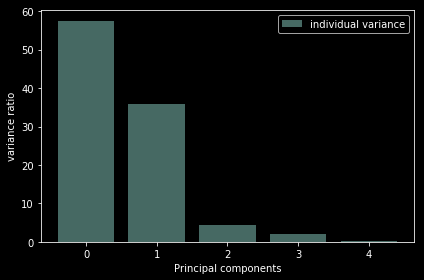

In [32]:
# Visualising Variation
tot = sum(eig_vals)
varince = [(j / tot) * 100 for j in sorted(eig_vals, reverse=True)]
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(5), varince, alpha=0.5, align='center', label='individual variance')
    plt.ylabel('variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

New Representation:
[[-1.71676152  0.99766631]
 [ 2.3573254   1.06232346]
 [ 2.6061636  -0.12567527]
 [-0.81377078  1.80752707]
 [-0.58956278  1.62649237]
 [ 1.22521682 -1.61029634]
 [ 1.81164729  1.64559242]
 [-0.10178181 -1.19682324]
 [-1.38906942 -0.79284585]
 [-3.32776225  0.08257629]
 [ 0.4019692  -1.86207069]
 [-0.46361373 -1.63446653]]


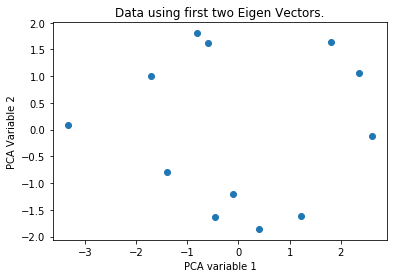

In [33]:
# Dimension  Reduction for k=2
matrix_w = np.hstack((eig_pairs[0][1].reshape(5, 1),
                      eig_pairs[1][1].reshape(5, 1)))
# New Space
Y = X_std.dot(matrix_w)
print('New Representation:\n%s' % Y)

y1, y2 = Y.T
plt.scatter(y1, y2)
plt.title("Data using first two Eigen Vectors.")
plt.xlabel('PCA variable 1')
plt.ylabel('PCA Variable 2')
plt.show()

In [35]:
#Used Sklearn for Reconstruction
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
pca = PCA(n_components=2)
pca.fit(X_std)
data_reduced = np.dot(X_std, pca.components_.T) # transform
data_original = np.dot(data_reduced, pca.components_) # inverse_transform
print('\nOriginal normalised Data:\n%s'% X_std)
print('\nReconstructed Data from PCA components:\n%s'% data_original)
m_error=mean_squared_error(X_std,data_original)
print("\nReconstruction Error:",m_error)


Original normalised Data:
[[-0.16446318  0.79412107  0.14024818  1.35563276  1.31223972]
 [-1.5914975  -0.31667405 -1.45858105 -1.00725786 -1.14820976]
 [-0.86279912 -1.54439497 -1.12198543 -1.00725786 -1.31223972]
 [-0.74134939  1.26182428 -0.53294308  0.17418745  1.31223972]
 [-0.68062453  0.79412107 -0.61709198  0.17418745  1.31223972]
 [ 0.59459763 -1.83670948  0.22439709 -0.55285582 -0.82014983]
 [-1.53077263 -0.02435954 -1.62687887 -1.00725786 -0.16402997]
 [ 0.86785953  0.03410336  0.81343943 -0.55285582 -0.4920899 ]
 [ 1.11075898  0.61873237  0.89758834  0.53770908  0.16402997]
 [ 1.01967169  1.32028718  1.06588616  2.44619766  1.31223972]
 [ 1.01967169 -1.07669176  0.81343943 -0.371095   -0.82014983]
 [ 0.95894682 -0.02435954  1.40248178 -0.18933418 -0.65611986]]

Reconstructed Data from PCA components:
[[-0.01183895  1.1823121   0.1406294   1.02195113  1.21673555]
 [-1.44705187 -0.63496184 -1.51056211 -1.21399552 -0.65787195]
 [-0.81760147 -1.23038269 -0.96577759 -1.44331693